# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 1</span>

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Exercise 01.1


The purpose of this exercise is to test the Pseudo-Random Number generator downloaded from the NSL Ariel web site.
The first step consists in making an estimation of  $\langle r \rangle = \int_0^1 r dr = 1/2$ and its statistical uncertainty using the blocking method, then to compute the variance value ($\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$) in function of number of blocks and finally to perform a chi-squared test to show the goodness of the generator.

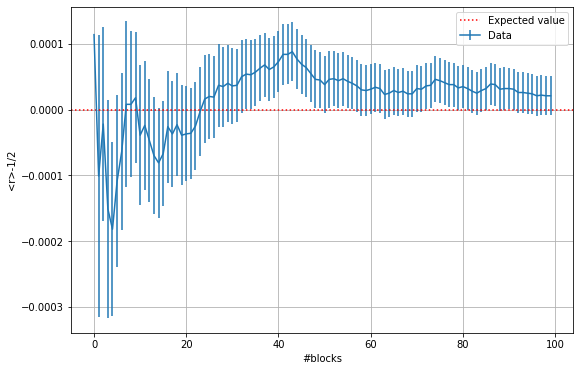

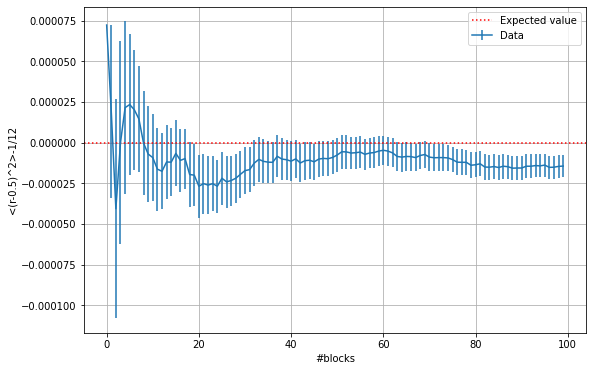

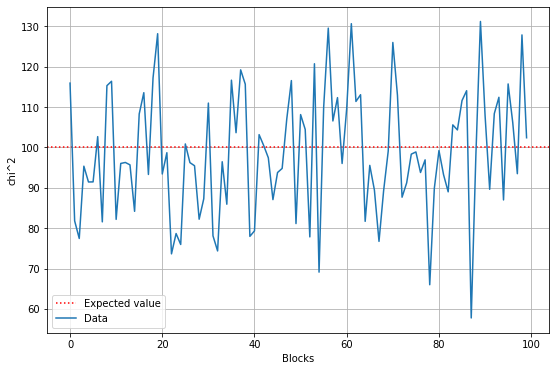

Average chi^2 =  98.5281


In [57]:
# Mean
plt.figure(1, figsize = (9, 6))

prog_average = np.loadtxt("../results/EX011(1).dat", usecols=0)
prog_error = np.loadtxt("../results/EX011(1).dat", usecols=1)
x = np.arange(0,100) # Number of throws = block * (Number of throws in each block)

plt.axhline(y=0, color='r', linestyle="dotted", label = "Expected value")

plt.errorbar(x, prog_average - 0.5, yerr=prog_error, label="Data")
plt.xlabel('#blocks')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.legend()

# Variance
plt.figure(2, figsize = (9, 6))
prog_average = np.loadtxt("../results/EX011(2).dat", usecols=0)
prog_error = np.loadtxt("../results/EX011(2).dat", usecols=1)
x = np.arange(0,100) # Number of throws = block * (Number of throws in each block)

plt.axhline(y=0, color='r', linestyle="dotted", label = "Expected value")
plt.errorbar(x, prog_average - 1/12, yerr=prog_error, label="Data")
plt.xlabel('#blocks')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.legend()

# Chi^2
plt.figure(3, figsize = (9, 6))
chi_sqrd = np.loadtxt("../results/chi_sqrd.dat", usecols=0)
x = np.arange(0,100) # Number of throws = block * (Number of throws in each block)

plt.axhline(y=100, color='r', linestyle="dotted", label = "Expected value")
plt.plot(x,chi_sqrd, label="Data" )
plt.xlabel('Blocks')
plt.ylabel('chi^2')
plt.grid(True)
plt.legend()

plt.show()

average_chi_sqrd = np.sum(chi_sqrd,0)/100
print("Average chi^2 = ", average_chi_sqrd)

The plot of the mean value shows a discrepancy between the expected value and the data obtained greater than the standard deviation, although within twice its value.
The average value of the variance is within the error bar and in good agreement with the expected value.

The chi-squared test, calculated dividing $[0,1]$ into $M=100$ sub-intervals, revealed a value averaged over $j=1,...,100$ realizations of $n=10^4$ throws, of $\chi^2=98.6$, very close to the expected one ($\chi^2_{expected}=M=100$).
The last plot shows the $\chi^2$ value calculated in each realization. We can see it oscillating around the expected value, as a confirmation that we cannot say that our numbers are **not** drawn from a uniform distribution. We therefore assume them to be uniformly distributed.

### Exercise 01.2

The aim of this exercise is to extend the Pseudo-Random Number generator by adding two probability distributions using the method of the inversion of the cumulative distribution to sample an exponential distribution $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ and a Cauchy-Lorentz distribution $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$.
Than we make 3 pictures, each of them containing 4 histograms obtained with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ varying $N=1,2,10,100$, using the *uniform dice*, *exponential dice* and *Lorentzian dice* respectively.

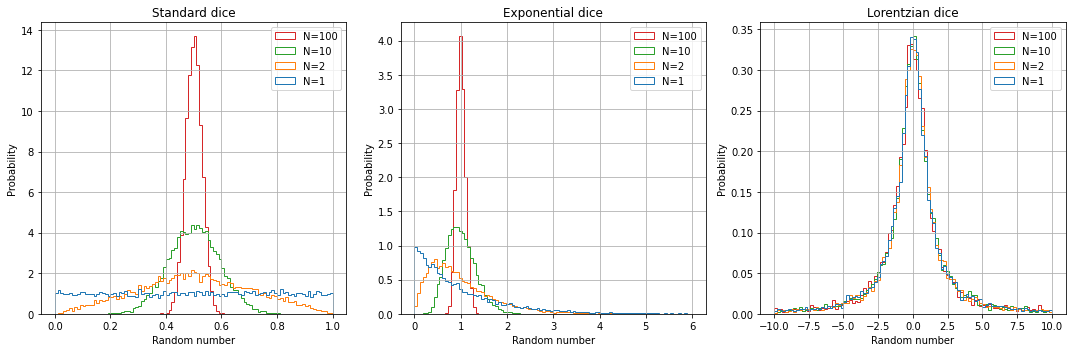

In [36]:
average_standard_dice = np.loadtxt("../results/EX012.dat", usecols=(0,3,6,9))
average_exponential_dice = np.loadtxt("../results/EX012.dat", usecols=(1,4,7,10))
average_lorentzian_dice = np.loadtxt("../results/EX012.dat", usecols=(2,5,8,11))

n_bins = 100
plt.figure(figsize=(15,5))

# Using subplot ambient to draw graphs side by side
plt.subplot(131)
standard_dice_hist = plt.hist([average_standard_dice[:,0],average_standard_dice[:,1],
          average_standard_dice[:,2],average_standard_dice[:,3]], n_bins, density=True,\
          label=['N=1','N=2','N=10','N=100'], range=(0,1), histtype='step')
plt.title('Standard dice')
plt.grid(True)
plt.legend ()
plt.xlabel('Random number')
plt.ylabel('Probability')

plt.subplot(132)
exponential_dice_hist = plt.hist([average_exponential_dice[:,0],average_exponential_dice[:,1],
          average_exponential_dice[:,2],average_exponential_dice[:,3]], n_bins, density=True,\
          label=['N=1','N=2','N=10','N=100'], range=(0,6), histtype='step')
plt.title('Exponential dice')
plt.grid(True)
plt.legend ()
plt.xlabel('Random number')
plt.ylabel('Probability')

plt.subplot(133)
lorentzian_dice_hist = plt.hist([average_lorentzian_dice[:,0],average_lorentzian_dice[:,1],
          average_lorentzian_dice[:,2],average_lorentzian_dice[:,3]], n_bins, density=True,\
          label=['N=1','N=2','N=10','N=100'], range=(-10,10), histtype='step')
plt.title('Lorentzian dice')
plt.grid(True)
plt.legend ()
plt.xlabel('Random number')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()

We observe that, increasing $N$, the first two distributions tend to became gaussian, since the central limit theorem applies.
In the latter case, since Cauchy-Lorentz distribution hasn't a finite variance, this fact doesn't happen.
However this distribution is stable, which means that increasing indefinitely $N$ we always get a Cauchy-Lorentz distribution.
We then try to fit the case $N=100$ with a Gaussian function for standard and exponential dices and a Lorentzian function for the last case.

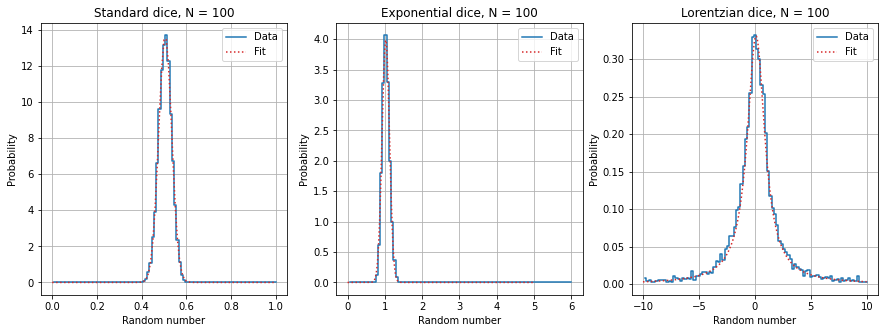

In [55]:
from scipy.optimize import curve_fit

def gauss(x, mean, sigma):
    return 1. / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * sigma**2))
def lorentz(x, x0, y0):
    return 1 / np.pi * y0 / ((x - x0)**2 + y0**2)

popt_std, pcov_std = curve_fit(gauss, standard_dice_hist[1][1:], standard_dice_hist[0][3])
popt_exp, pcov_exp = curve_fit(gauss, exponential_dice_hist[1][1:],exponential_dice_hist[0][3])
popt_lor, pcov_lor = curve_fit(lorentz, lorentzian_dice_hist[1][1:],lorentzian_dice_hist[0][3])

plt.figure(figsize=(15,5))

# Using subplot ambient to draw graphs side by side
plt.subplot(131)
plt.step(standard_dice_hist[1][1:],standard_dice_hist[0][3], where='mid', color="tab:blue", label="Data")
plt.plot(np.arange(0.,1.,0.01), gauss(np.arange(0.,1.,0.01), popt_std[0], popt_std[1]), color="tab:red", linestyle="dotted", label="Fit")
plt.grid(True)
plt.xlabel('Random number')
plt.ylabel('Probability')
plt.legend()
plt.title("Standard dice, N = 100")


plt.subplot(132)
plt.step(exponential_dice_hist[1][1:],exponential_dice_hist[0][3], where='mid', color="tab:blue", label="Data")
plt.plot(np.arange(0.,5.,0.01), gauss(np.arange(0.,5.,0.01), popt_exp[0], popt_exp[1]), color="tab:red", linestyle="dotted", label="Fit")
plt.grid(True)
plt.xlabel('Random number')
plt.ylabel('Probability')
plt.legend()
plt.title("Exponential dice, N = 100")

plt.subplot(133)
plt.step(lorentzian_dice_hist[1][1:],lorentzian_dice_hist[0][3], where='mid', color="tab:blue", label="Data")
plt.plot(np.arange(-10.,10.,0.01), lorentz(np.arange(-10.,10.,0.01), popt_lor[0], popt_lor[1]), color="tab:red", linestyle="dotted", label="Fit")
plt.grid(True)
plt.xlabel('Random number')
plt.ylabel('Probability')
plt.legend()
plt.title("Lorentzian dice, N = 100")

plt.show()

In the first two cases a gaussian function seems to approximate well the distribution of the sum of the random variables, confirming the validity of central limit theorem.
In the third case we observe the self-similarity of the distribution of the sum of the Cauchy-Lorentz distributed random variables with $N=100$ confirming the stability of this distribution.

### Exercise 01.3

In this exercise we wanted to simulate the Buffon’s experiment to calculate an estimate of the value of $\pi$.
The picture of the estimation of $\pi$ and its uncertainty, as a function of the number of blocks, is shown below.

I'm using $2$ units as the distance between two lines and $1.2$ units as the lenght of the needles, resulting in a probability of hitting a line of $P \sim 0.4$.

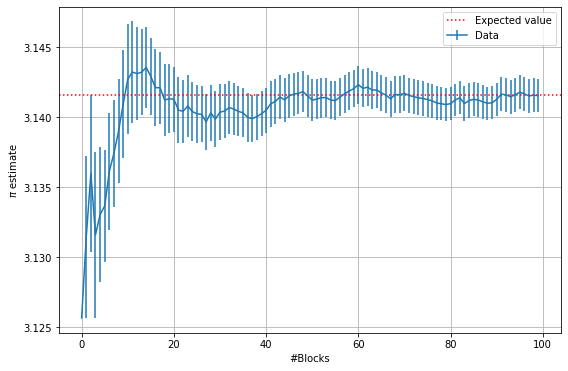

In [63]:
plt.figure(figsize = (9, 6))

pi_estimate, std_err = np.loadtxt("../results/EX013.dat", delimiter = " ", unpack = True)
x = np.arange(0,100)

plt.ylabel('$\pi$ estimate')
plt.xlabel('#Blocks')
plt.grid(True)
plt.axhline(y=np.pi, color='r', linestyle="dotted", label = "Expected value")
plt.errorbar(x, pi_estimate, std_err, label = "Data")
plt.legend()

plt.show()

The final value of $3.1416 ± 0.0012$ is in good agreement with the correct value of $\pi$.